In [10]:
import pandas as pd
from textblob import TextBlob
import time
import os
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import streamlit as st 
import folium
from streamlit_folium import folium_static

2025-03-25 01:14:51.820 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [2]:
df1 = pd.read_excel("../resources/dataset/Updated Challenge dataset.xlsx", sheet_name="Candidat au don 2019 (avec anne")

In [3]:
df1.head()

,Date de remplissage de la fiche,Date de naissance,Niveau d'etude,Genre,Taille,Poids,Situation Matrimoniale (SM),Profession,Arrondissement de résidence,Quartier de Résidence,...,"Raison de non-eligibilité totale [Porteur(HIV,hbs,hcv)]",Raison de non-eligibilité totale [Opéré],Raison de non-eligibilité totale [Drepanocytaire],Raison de non-eligibilité totale [Diabétique],Raison de non-eligibilité totale [Hypertendus],Raison de non-eligibilité totale [Asthmatiques],Raison de non-eligibilité totale [Cardiaque],Raison de non-eligibilité totale [Tatoué],Raison de non-eligibilité totale [Scarifié],Si autres raison préciser
0,3/11/0019,1999-09-01 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Chaudronnier,Douala 3,Logbaba,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/21/0019,1978-02-04 00:00:00,Universitaire,Homme,NaN,NaN,Marié (e),Secrétaire comptable,Douala (Non précisé ),NDOGPASSI 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1977-12-25 00:00:00,1977-12-25 00:00:00,Secondaire,Femme,NaN,NaN,Marié (e),Commerçant (e),Douala (Non précisé ),Dakar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-02-06 00:00:00,1986-02-06 00:00:00,Secondaire,Homme,NaN,NaN,Célibataire,Homme d’affaire,Douala 5,NGANGUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1988-05-20 00:00:00,1988-05-20 00:00:00,Pas Précisé,Homme,NaN,NaN,Célibataire,Beat Maker,Douala (Non précisé ),Douala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2 = pd.read_excel("../resources/dataset/Updated Challenge dataset.xlsx", sheet_name="Donneurs 2019")

In [5]:
df2.head()

,Horodateur,Sexe,Age,Type de donation,Groupe Sanguin ABO / Rhesus,Phenotype
0,2020-07-16 19:02:33.994,M,26,F,B+,"RH-2, RH+4, RH-3, RH+5, -kell1"
1,2020-07-16 19:05:51.521,M,24,F,O+,"RH-2, RH+4, RH-3, RH+5, -kell1"
2,2020-07-17 04:52:09.054,M,41,F,A+,"RH+2, RH+4, RH-3, RH+5, -kell1"
3,2020-07-17 04:56:03.200,M,20,F,O+,"RH-2, RH+4, RH-3, RH+5, -kell1"
4,2020-07-17 05:49:40.730,M,34,F,O+,"RH-2, RH+4, RH+3, RH+5, -kell1"


In [6]:

def donation_sentiment(row):
    if row["A-t-il (elle) déjà donné le sang"] == "Oui":
        if pd.notna(row["Si oui preciser la date du dernier don."]):
            return "Positive"  # Recent donor
        else:
            return "Neutral"  # Donated before but no recent record
    return "Negative"  # Never donated

df1["Sentiment de Don"] = df1.apply(donation_sentiment, axis=1)


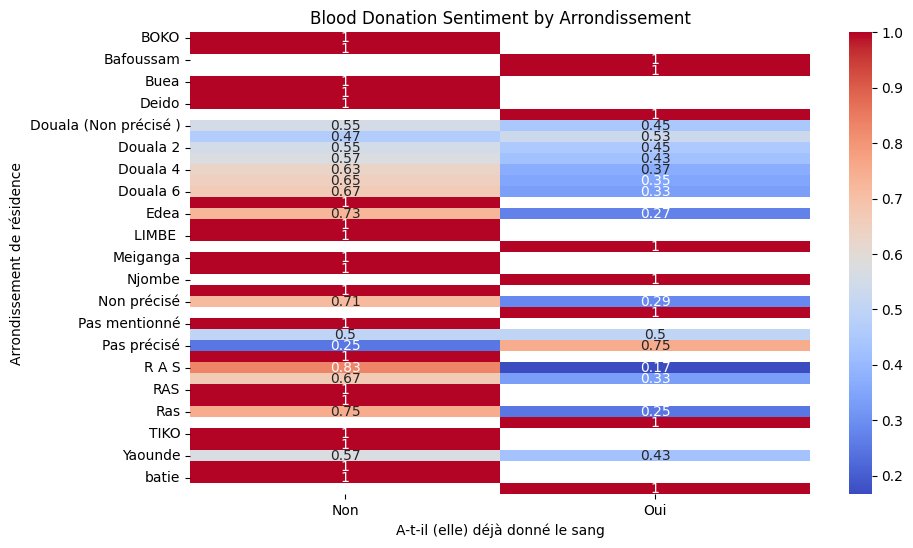

In [7]:

geo_sentiment = df1.groupby("Arrondissement de résidence")["A-t-il (elle) déjà donné le sang"].value_counts(normalize=True).unstack()

# Heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(geo_sentiment, cmap="coolwarm", annot=True)
plt.title("Blood Donation Sentiment by Arrondissement")
plt.show()

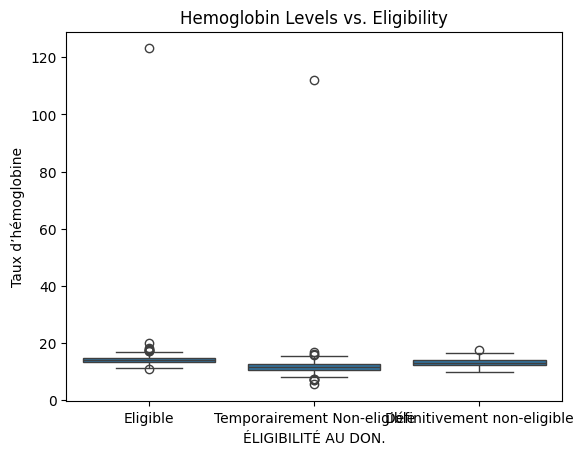

In [8]:
# Convert "Taux d’hémoglobine" to numeric, forcing errors to NaN
df1["Taux d’hémoglobine"] = pd.to_numeric(df1["Taux d’hémoglobine"], errors='coerce')


# Now plot
sns.boxplot(x="ÉLIGIBILITÉ AU DON.", y="Taux d’hémoglobine", data=df1)
plt.title("Hemoglobin Levels vs. Eligibility")
plt.show()


In [9]:
# **Define sentiment based on hemoglobin level**
def health_sentiment(row):
    if row['Taux d’hémoglobine'] > 12:
        return "Positive"
    elif 10 <= row['Taux d’hémoglobine'] <= 12:
        return "Neutral"
    else:
        return "Negative"

df1['Sentiment de Santé'] = df1.apply(health_sentiment, axis=1)


In [11]:
# **Streamlit Dashboard**
st.title(" Blood Donation Sentiment Analysis")

# Sidebar filter for eligibility
eligibility_filter = st.sidebar.selectbox("Filter by Eligibility", 
                                          df1["ÉLIGIBILITÉ AU DON."].unique())

filtered_df = df1[df1["ÉLIGIBILITÉ AU DON."] == eligibility_filter]

st.write(f"###  Hemoglobin Levels for {eligibility_filter} Donors")


2025-03-25 01:15:20.998 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:15:21.195 
  command:

    streamlit run C:\Users\THE EYE INFORMATIQUE\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-25 01:15:21.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:15:21.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:15:21.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:15:21.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:15:21.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01

2025-03-25 01:15:55.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:15:55.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:15:55.399 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

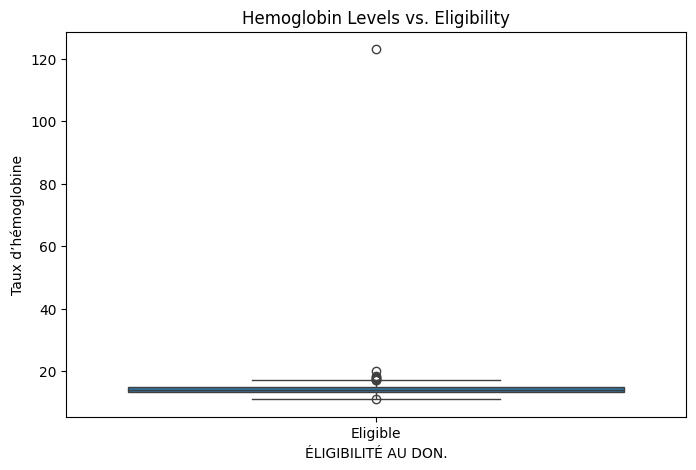

In [12]:
#  **Boxplot for Hemoglobin vs. Eligibility**
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x="ÉLIGIBILITÉ AU DON.", y="Taux d’hémoglobine", data=filtered_df, ax=ax)
plt.title("Hemoglobin Levels vs. Eligibility")
st.pyplot(fig)

In [13]:
# **Compare Other Health Factors (Poids, Taille)**
st.write("### Impact of Health Factors on Donation Eligibility")

2025-03-25 01:16:37.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:16:37.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:16:37.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:16:37.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [14]:
fig, ax = plt.subplots(figsize=(8,5))
filtered_df.groupby('Sentiment de Santé')[['Poids', 'Taille']].mean().plot(kind='bar', ax=ax)
plt.title("Health Factors (Poids & Taille) by Sentiment")
st.pyplot(fig)

st.write("Insights: Low hemoglobin donors might also have lower weight or height. Addressing this can help improve donor eligibility.")

2025-03-25 01:17:40.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:17:40.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:17:40.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:17:40.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:17:40.911 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:17:40.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:17:40.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [16]:
# **Save Results**
df1.to_csv("sentiment_analysis_results.csv", index=False)
st.write(" Data saved successfully!")

2025-03-25 01:19:37.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:19:37.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:19:37.573 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 01:19:37.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
